In [4]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree

# Splitting Data into:80% Training and 20% Test

In [3]:
# Load data
df = pd.read_csv("HousePricing.csv")
print(df.head())   # get the first 5 rows

       area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  0.686780       4.0        2.0      3.0         1          0         0   
1  0.843390       4.0        3.5      3.5         1          0         0   
2  0.945085       3.0        2.0      2.0         1          0         1   
3  0.694915       4.0        2.0      2.0         1          0         1   
4  0.686780       4.0        1.0      2.0         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  \
0                0                1      2.0         1                 3   
1                0                1      2.5         0                 3   
2                0                0      2.0         1                 2   
3                0                1      2.5         1                 3   
4                0                1      2.0         0                 3   

   price  
0      1  
1      1  
2      1  
3      1  
4      1  


In [6]:
# split dataset in features and target variable
fn=df.keys().tolist() [:-1]
X=df[fn]
y=df['price']
print(fn)

['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf3 = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf3 = clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)



[[49  5]
 [16 39]]


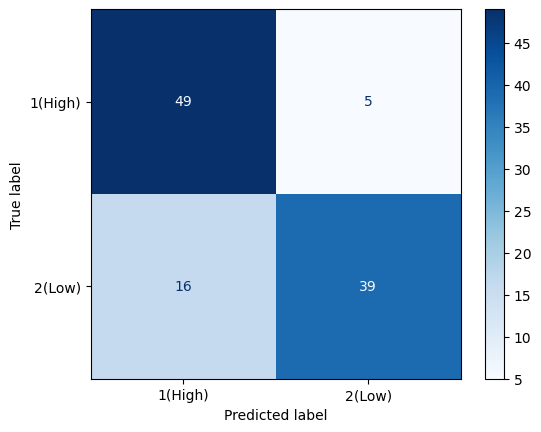

In [10]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


# Assuming you already have cm, y_test, and y_pred computed
cm = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(High)', 2: '2(Low)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The displayed confusion matrix summarizes the performance of a classification model with two classes labeled as "High" and "Low." This confusion matrix provides an evaluation of the model's classification ability. In this 2x2 matrix:

* **Top-Left Cell (49**: Represents the number of instances of the negative class that were correctly classified as negative **(True Negatives, TN)**.
* **Top-Right Cell (5)**: Represents the number of instances of the negative class that were incorrectly classified as positive **(False Positives, FP)**.
* **Bottom-Left Cell (16)**: Represents the number of instances of the positive class that were incorrectly classified as negative **(False Negatives, FN)**.
* **Bottom-Right Cell (39)**: Represents the number of instances of the positive class that were correctly classified as positive **(True Positives, TP)**.
  
This matrix illustrates how well the model distinguishes between the positive and negative classes, with correct classifications appearing on the diagonal (top-left and bottom-right cells).

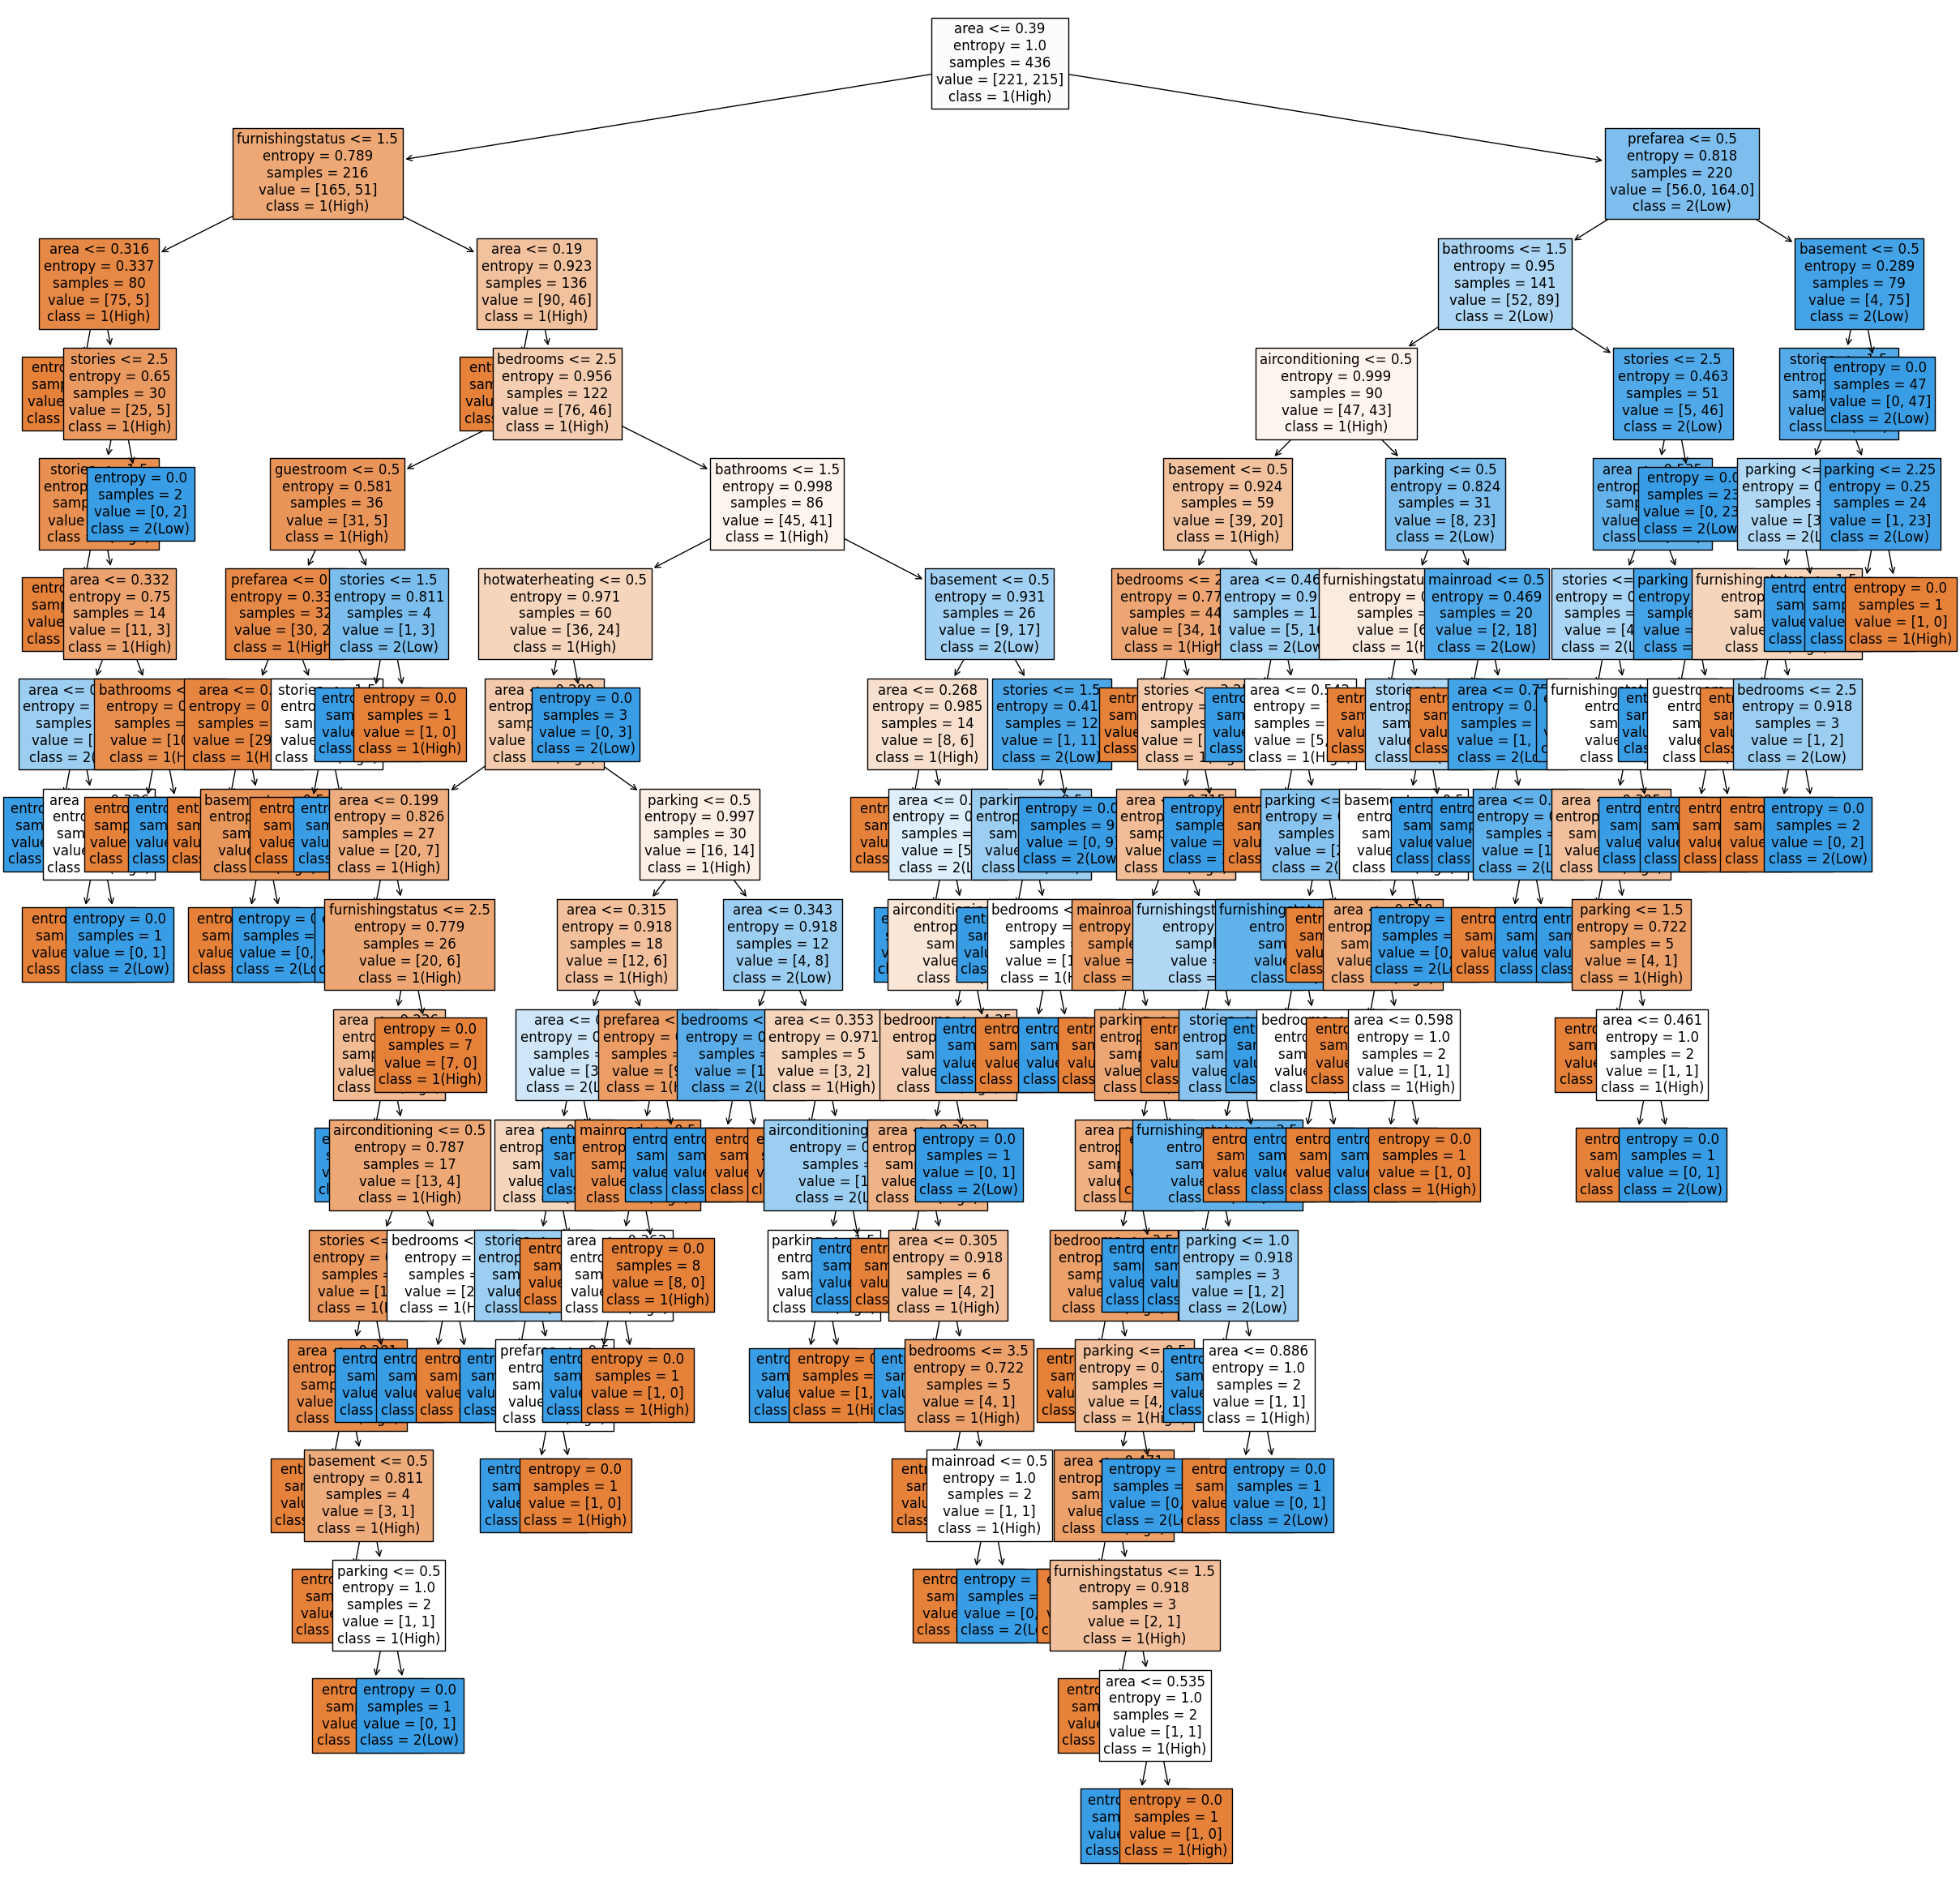

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30, 30), dpi=100)

# Define class labels for display
class_labels = {1: '1(High)', 2: '2(Low)'}

# Plot the tree with a larger font size
tree.plot_tree(
    clf3,
    feature_names=fn,
    class_names=[class_labels[1], class_labels[2]],
    filled=True,
    fontsize=12  # Adjust this value as needed for readability
)

plt.show()

In the decision tree, the area feature is used as the first split criterion, dividing samples based on their area values. This initial split helps separate the data into groups with potentially different classifications, setting the foundation for further branching and improving classification accuracy as the tree progresses.

#### Analysis Based on Key Points:
    
* **Importance**: At the root, the split uses area ≤ 0.39, highlighting the significance of this feature in distinguishing between classes. This primary split acts as a critical decision point, indicating that area has a substantial impact on predicting the class.

* **Subsequent Branching**: After the initial split, the data is further divided based on other features like furnishingstatus, stories, and parking. Each additional split enhances the model's accuracy by reducing misclassification between target classes.

* **Class Distribution**: Samples with area ≤ 0.39 tend to belong to one class, while samples with area > 0.39 are likely to belong to another class. Additionally, features such as number of stories and furnishing status help refine classification and minimize errors.

#### Summary:
Using area ≤ 0.39 as the first split point allows the model to classify samples effectively, directing the decision tree toward more accurate predictions by isolating distinct class distributions early in the branching process.

In [12]:
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm3)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[49  5]
 [16 39]]
Accuracy: 0.8073394495412844
Error Rate: 0.19266055045871555
Sensitivity: 0.7090909090909091
Specificity: 0.9074074074074074
Precision: 0.8863636363636364



* **Accuracy**: Accuracy measures the overall correctness of the model. In this case, it is 0.8073 (80.7%), meaning that 80.7% of the predictions were correct.

* **Error Rate**: The Error Rate represents the proportion of wrong predictions. Here, it is 0.1927 (19.3%), meaning that approximately 19.3% of the predictions were incorrect.

* **Sensitivity (Recall)**: Sensitivity (Recall) indicates the model's ability to correctly identify positive cases. It is 0.7091 (70.9%), meaning the model successfully identified 70.9% of the positive cases.

* **Specificity**: Specificity measures the model's ability to correctly identify negative cases. Here, it is 0.9074 (90.7%), indicating the model correctly identified 90.7% of the negative cases.

* **Precision**: Precision indicates the accuracy of positive predictions, showing how many predicted positives are actually positive. It is 0.8864 (88.6%), meaning that 88.6% of the positive predictions were correct.